#Exploratory Data Analysis - Haberman’s Cancer Survival Dataset

***Understanding the dataset***

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

There are 4 attribites in this dataset out of which 3 seem to be features/characteristics of patients in this study. The last attribute corresponds to whether or not a particular patient survived for more than 5 years after the treatment for breast cancer.

Haberman's dataset specifies that some patients were found to have anywhere between 0 to 52 cancer positive auxillary lymph nodes. 

What this means is that having cancer cells in auxillary(under the armpit) lymph nodes means one's cancer is considered lymph node-positive. Based on TNM staging, tumor would be called either N1, N2, or N3 depending on how many lymph nodes contain cancer cells and how far away from the tumor the positive nodes are found.

* N1: Positive- 1 to 3 auxillary lymph nodes have cancer cells.
* N2: Positive- 4 to 9 auxillary lymph nodes have cancer cells.
* N3: Positive- 10 or more auxillary lymph nodes have cancer cells.

Sources:
* https://www.cancer.ca/en/cancer-information/cancer-101/what-is-cancer/stage-and-grade/staging/?region=on
* https://www.verywellhealth.com/lymph-node-positive-breast-cancer-429953


***Attribute Information***
1. age - Age of patient at the time of surgery. A numerical value
2. year - Year in which patient had undergone the surgery. A numerical value.
3. nodes - No.of cancer positive auxillary lymph nodes detected. A numerical value
4. status - Specifies whether the patient survived for more than 5 years or died within 5 years of the surgery. This also serves as our class attribute.

Source :https://www.kaggle.com/gilsousa/habermans-survival-data-set)


##***OBJECTIVE***:

To predict whether the patient will survive for more than 5 years after the surgery or not based on analysing his/her age, year of treatment and the number of positive lymph nodes found.



In [108]:
# Importing necessary libraries that I'll be working with throughout this assignment
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Haberman Data set

In [109]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman (2).csv


In [110]:
import io

# Reading Haberman Cancer Survival Dataset as a pandas dataframe

haberman = pd.read_csv(io.BytesIO(uploaded['haberman.csv']))
print(haberman)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


In [111]:
# Get dimension of the dataframe

print(haberman.ndim)

2


In [112]:
# Get how many datapoints(rows) and features(columns) are there in the dataframe

print(haberman.shape)

(306, 4)


In [113]:
# Get list of all column names in the dataframe

print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


###### Let's make column names more descriptive and readable. One way to do that is to use a pandas library method- rename() which takes a dictionary of columns as input and returns renamed dataframe.

Source: 
https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.rename.html


In [114]:
# Rename columns of dataframe

haberman.rename(columns={'age':'patient_age', 'year':'surgery_year', 'nodes':'positive_nodes', 'status':'survival_status'}, inplace=True)

In [115]:
# Get first 10 data points of newly renamed data frame

print(haberman.head(10))

   patient_age  surgery_year  positive_nodes  survival_status
0           30            64               1                1
1           30            62               3                1
2           30            65               0                1
3           31            59               2                1
4           31            65               4                1
5           33            58              10                1
6           33            60               0                1
7           34            59               0                2
8           34            66               9                2
9           34            58              30                1


In [116]:
# Get information about dataset

print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   patient_age      306 non-null    int64
 1   surgery_year     306 non-null    int64
 2   positive_nodes   306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [117]:
# Get how many number of patients survived more than 5 years after treatment and how many died within 5 years after treatment.

haberman["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [118]:
# Check if the dataset has any missing or null values

print(haberman.isnull().sum())

patient_age        0
surgery_year       0
positive_nodes     0
survival_status    0
dtype: int64


**Observations:**

* There are no missing values in this dataset i.e. no NaN values in any column.
* 225 patients out of 306 survived more than 5 years and 81 patients died within 5 years after the surgery i.e. 73.53% of patients survived after treatment.
* We can derive that survival_status=1 means the patient had survived more than 5 years after the treatment and survival_status=2 means the patient did not survive. We can map accordingly.
* Data type of all columns is integer.
* This is an *imbalanced dataset* as no.of datapoints for two classes differ vastly.


##Mean, Variance and Standard Deviation:

In [119]:
print(haberman.describe())

       patient_age  surgery_year  positive_nodes  survival_status
count   306.000000    306.000000      306.000000       306.000000
mean     52.457516     62.852941        4.026144         1.264706
std      10.803452      3.249405        7.189654         0.441899
min      30.000000     58.000000        0.000000         1.000000
25%      44.000000     60.000000        0.000000         1.000000
50%      52.000000     63.000000        1.000000         1.000000
75%      60.750000     65.750000        4.000000         2.000000
max      83.000000     69.000000       52.000000         2.000000


**Observations:**

* Maximum and minimum ages of patients who survived the treatment are 77 & 30 respectively.
* 25% of patients have no positive lymph nodes and have the highest survival chances.
* Patient's age ranges between 30 to 83 with 52 as average age.
* ~ 75% of patients have <= 4 positive nodes.

#Univariate Analysis

### 1D Scatter Plots

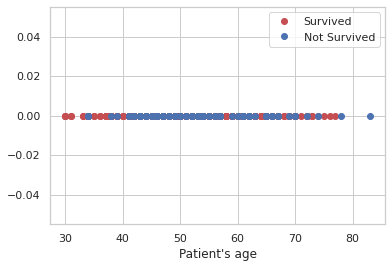

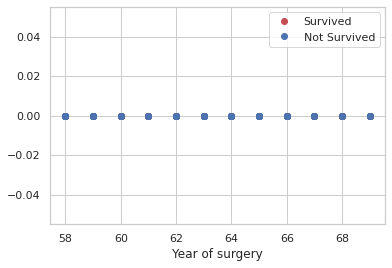

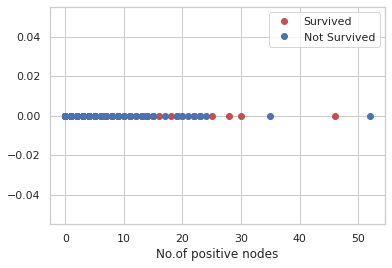

In [120]:
# Create separate dataframes for different classes in survival_status column

haberman_status_1 = haberman.loc[haberman['survival_status'] == 1]
haberman_status_2 = haberman.loc[haberman['survival_status'] == 2]

# Plot 1D scatter plots for each of the features attributes- patient_age, surgery_year, positive_nodes

plt.figure(1)
plt.plot(haberman_status_1['patient_age'], np.zeros_like(haberman_status_1['patient_age']),'ro', label='Survived')
plt.plot(haberman_status_2['patient_age'], np.zeros_like(haberman_status_2['patient_age']), 'bo', label='Not Survived')
plt.xlabel('Patient\'s age')
plt.legend()

plt.figure()
plt.plot(haberman_status_1['surgery_year'], np.zeros_like(haberman_status_1['surgery_year']),'ro', label='Survived')
plt.plot(haberman_status_2['surgery_year'], np.zeros_like(haberman_status_2['surgery_year']), 'bo', label='Not Survived')
plt.xlabel('Year of surgery')
plt.legend()

plt.figure(3)
plt.plot(haberman_status_1['positive_nodes'], np.zeros_like(haberman_status_1['positive_nodes']),'ro', label='Survived')
plt.plot(haberman_status_2['positive_nodes'], np.zeros_like(haberman_status_2['positive_nodes']), 'bo', label='Not Survived')
plt.xlabel('No.of positive nodes')
plt.legend()

plt.show()

**Observations:**

* By looking at above plots, we are not able to find any distinguishable features among patient's age, positive nodes and his/her survival status.
* Since there's so much overlapping, there's no way to determine how many data points are there between intervals.

###Histograms & Probability Distribution Function(PDF)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


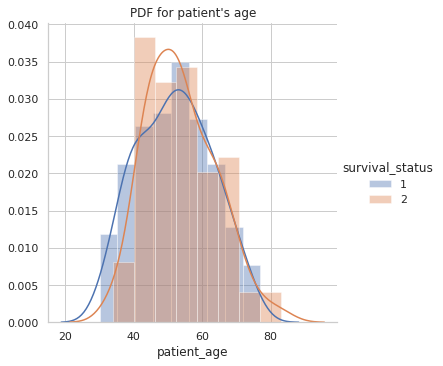

In [121]:
# Plot survival status based on patient's age using probablity distribution function

sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "patient_age") \
   .add_legend();
plt.title('PDF for patient\'s age')

plt.show();

**Observations:**

* Even though the overlap is quite high, we can say that patients aged 20-40 seem to have high chance of survival 
* The overlap with the non-survival curve might be because of high positive auxillary nodes (I will explore more on this in bivariate analysis section).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


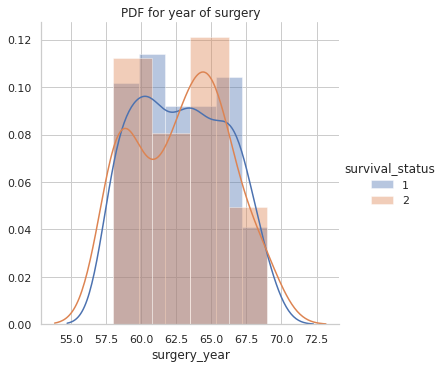

In [122]:
# Plot survival status based on year of surgery using probablity distribution function

sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "surgery_year") \
   .add_legend();
plt.title('PDF for year of surgery')

plt.show();

**Observations:**

Overlap is huge. The year of surgery can not be dependent for further analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


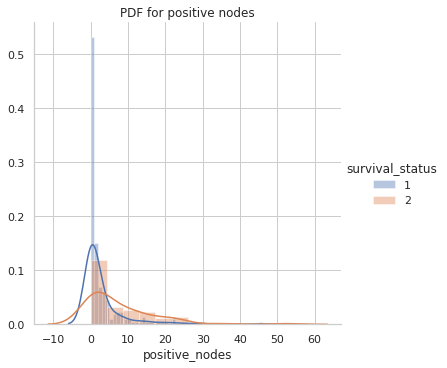

In [123]:
# Plot survival status based on positive nodes using probablity distribution function

sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "positive_nodes") \
   .add_legend();
plt.title('PDF for positive nodes')

plt.show();

**Observations:**

* Patient's with =< 0 positive nodes have unprecedented chances of survival.
* Survival chances gradually decrease with increasing no.of positive nodes

##Box Plots and Whiskers

Note: I won't be using year of surgery for analysis as a dependent attribute anymore as I was not able to gain any insights on whether the patient will survive the surgery or not based on year of surgery alone.

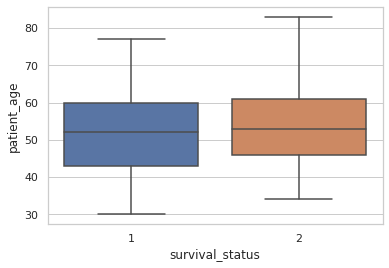

In [124]:
# Boxplot using patient's age

sns.boxplot(x='survival_status',y='patient_age', data=haberman)
plt.show()

**Observations:**

* Data overlapping is high when we consider patient's age only as an analysis parameter. It is hard to come to a conlusion on survival rate of a patient using age alone.

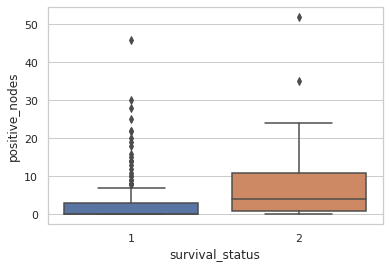

In [125]:
# Boxplot using no.of positive nodes a patient has

sns.boxplot(x='survival_status',y='positive_nodes', data=haberman)
plt.show()

**Observations:**

* 75 percentile of patients who survived have less than 4 positive nodes. 
* 50 percentile of patients who could not survive have higher no.of positive nodes
* As we've seen before, having less positive nodes is a dominant factor in determining the survival rate of the patient

##Violin Plots

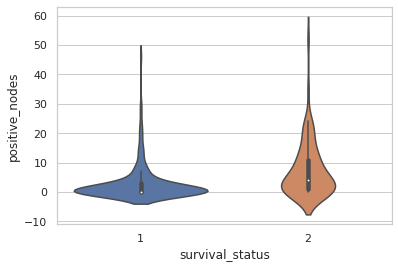

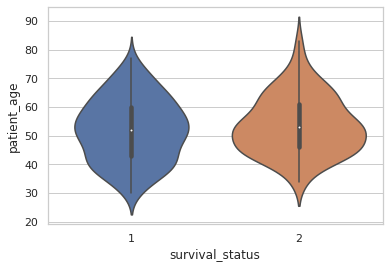

In [126]:
sns.violinplot(x="survival_status", y="positive_nodes", data=haberman, size=10)
plt.show()

sns.violinplot(x="survival_status", y="patient_age", data=haberman, size=10)
plt.show()

**Observations:**

* Again the plot distribution in fig(1) gives us the clear intuition that having less no.of auxillary nodes is a major factor in determining the survival rate.
* Age and survival rate overlapped highly in fig(2), hence it is hard to conclude anything from this age plot.

## Cumulative Distribution Function(CDF)

In [133]:
survived = haberman.loc[haberman['survival_status'] == 1]
not_survived = haberman.loc[haberman['survival_status'] == 2]

print(haberman.columns)

Index(['patient_age', 'surgery_year', 'positive_nodes', 'survival_status'], dtype='object')


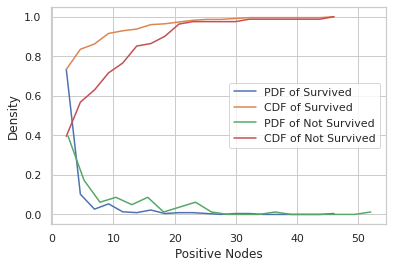

In [141]:
# Plot PDF & CDF based on no.of positive auxillary nodes
counts1,bin_edges = np.histogram(survived['positive_nodes'],bins=20,density=True)
counts2,bins1 = np.histogram(not_survived['positive_nodes'],bins=20,density=True)

pdf_survived = counts1/sum(counts1)
pdf_notsurvived = counts2/sum(counts2)

cdf_survived = np.cumsum(pdf_survived)
cdf_notsurvived = np.cumsum(pdf_notsurvived)

plt.plot(bin_edges[1:],pdf_survived)
plt.plot(bin_edges[1:],cdf_survived)

plt.plot(bins1[1:],pdf_notsurvived)

plt.plot(bin_edges[1:],cdf_notsurvived)

plt.xlabel("Positive Nodes")
plt.ylabel("Density")
plt.legend(["PDF of Survived","CDF of Survived","PDF of Not Survived","CDF of Not Survived"])
plt.show()

**Observations:**

* The percentage of patients who survived is more than 95% if they have less than 10 positive auxillary nodes.



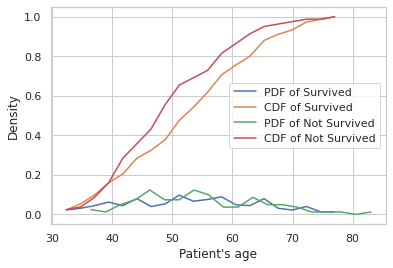

In [142]:
# Plot PDF & CDF based on patient's age

counts1,bin_edges = np.histogram(survived['patient_age'],bins=20,density=True)
counts2,bins1 = np.histogram(not_survived['patient_age'],bins=20,density=True)

pdf_survived = counts1/sum(counts1)
pdf_notsurvived = counts2/sum(counts2)

cdf_survived = np.cumsum(pdf_survived)
cdf_notsurvived = np.cumsum(pdf_notsurvived)

plt.plot(bin_edges[1:],pdf_survived)
plt.plot(bin_edges[1:],cdf_survived)

plt.plot(bins1[1:],pdf_notsurvived)

plt.plot(bin_edges[1:],cdf_notsurvived)

plt.xlabel("Patient's age")
plt.ylabel("Density")
plt.legend(["PDF of Survived","CDF of Survived","PDF of Not Survived","CDF of Not Survived"])
plt.show()

**Observations:**

There're no strong conclusions that can be drawn regarding patient's age.



#Multivariate Analysis - contour plot.


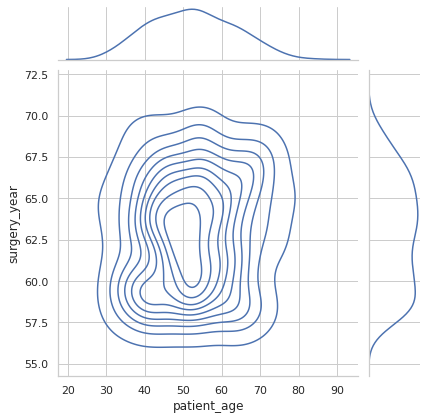

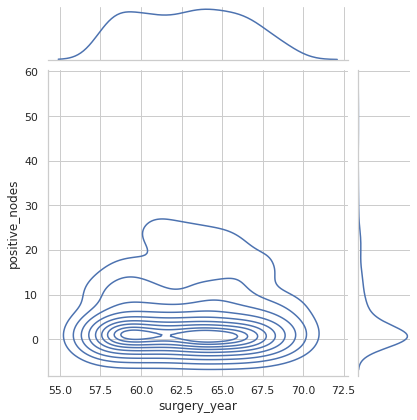

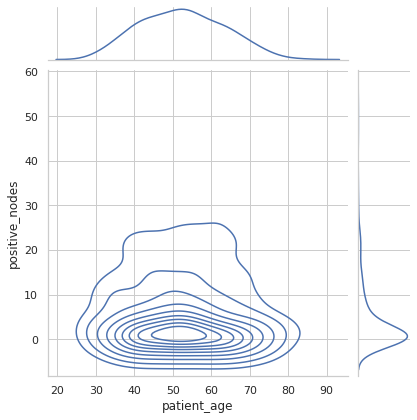

In [92]:
sns.jointplot(x="patient_age",y="surgery_year",data=haberman, kind="kde")
plt.show()

sns.jointplot(x="surgery_year",y="positive_nodes",data=haberman, kind="kde")
plt.show()

sns.jointplot(x="patient_age", y="positive_nodes", data=haberman, kind="kde");
plt.show()

# Bivariate Analysis

## 2-D Scatter Plot

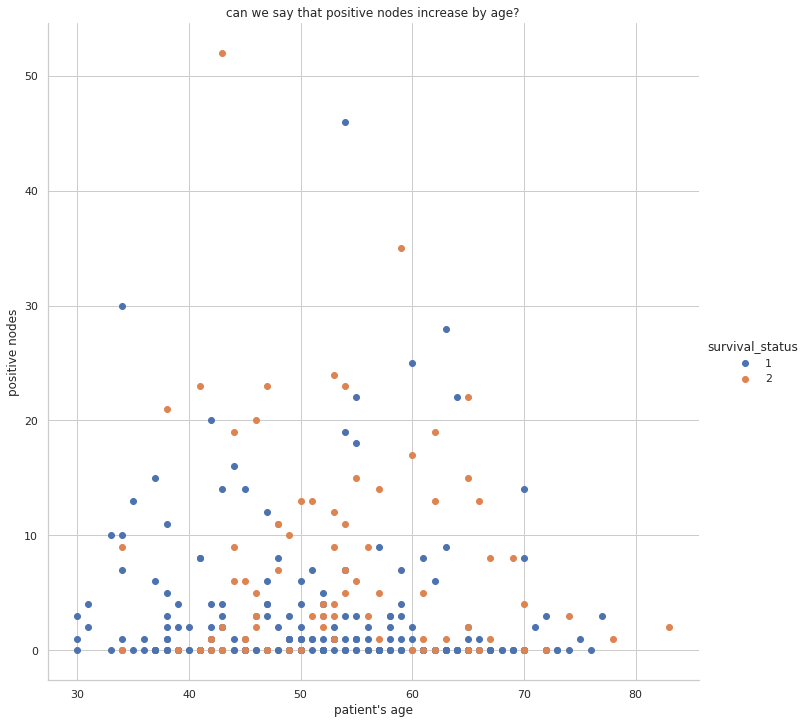

In [56]:
# Plot a simple 2D scatter plot with classes patient_age & positive_nodes on axes

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", height=10) \
   .map(plt.scatter, "patient_age", "positive_nodes") \
   .add_legend();
plt.xlabel("patient's age")
plt.ylabel("positive nodes")
plt.title('can we say that positive nodes increase by age?')

plt.show();

**Observations:**

* Patients with 0 positive nodes seem to have the highest chance of survival irrespective of their age.
* Patients whose age is <=30 are most likely to survive. 
* We can also conclude that patients between 30-40 years of age are also somewhat likely to survive except a few cases where positive nodes are high.
* Blue and Orange data points cannot be easily seperated.
* There is too much over lapping so no other significant observations can be made from this 2D scatter plot.


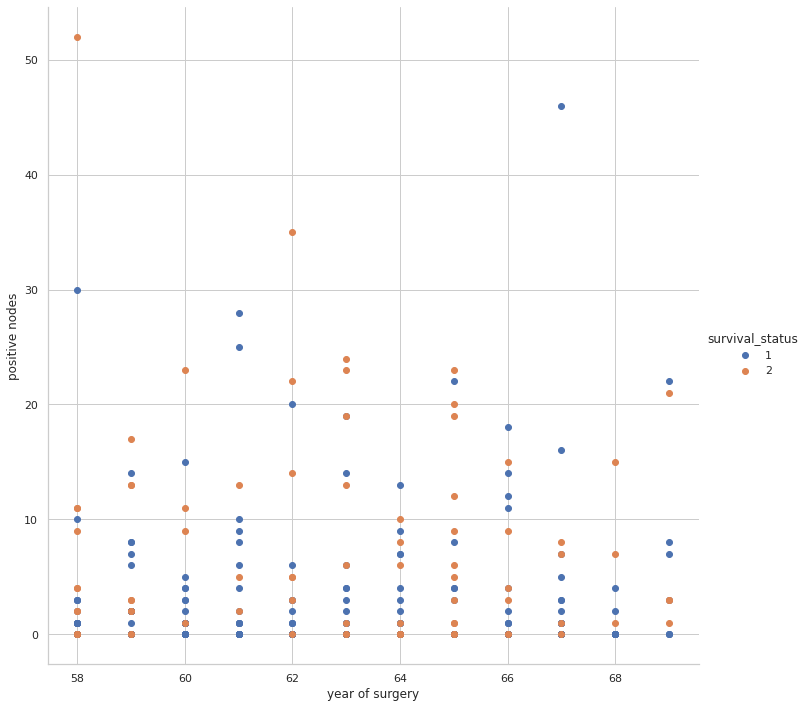

In [55]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", height=10) \
   .map(plt.scatter, "surgery_year", "positive_nodes") \
   .add_legend();
plt.xlabel("year of surgery")
plt.ylabel("positive nodes")
plt.show();

**Observations:**

Although it does seem like patients with less no.of positive nodes will survive regardless of age, there's no way in above plot to linearly separate the classes of patients.


## Pair Plots

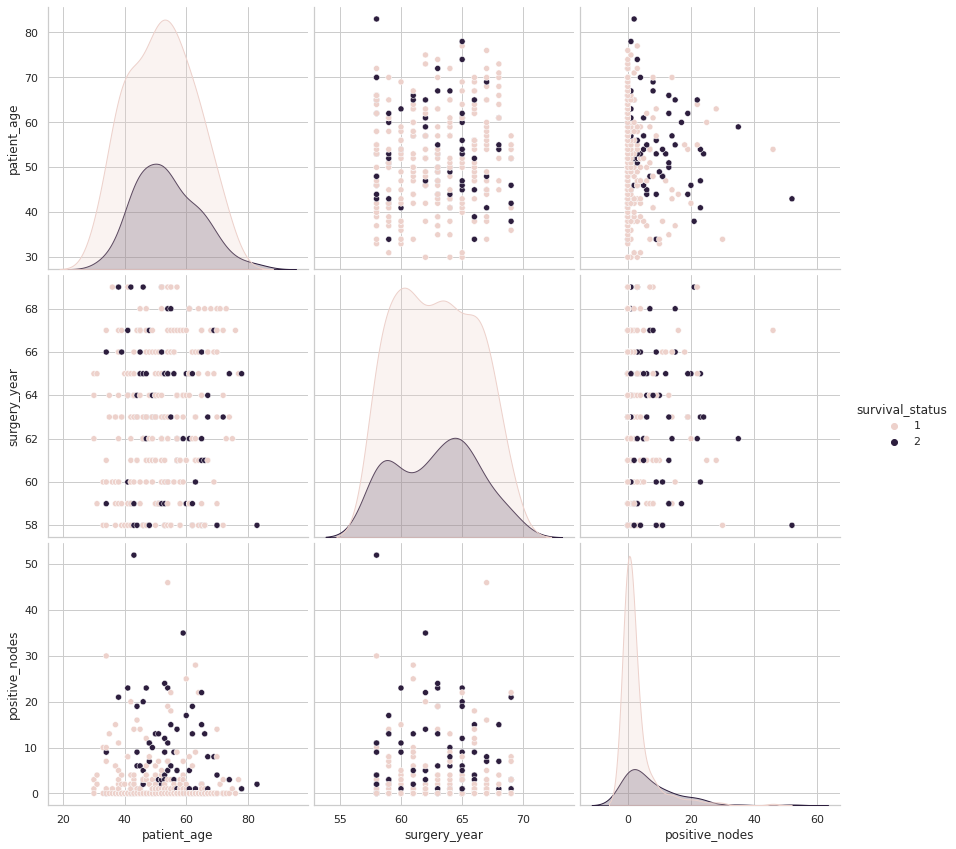

In [66]:
# Create a pair plot with all 3 feature attributes

sns.set_style("whitegrid")
sns.pairplot(haberman, hue="survival_status", height = 4)
plt.show()

**Observations:**

Even after using pair plots we are not able accurately classify the survival rates of the patients.

> However, when we analyse the plot between age and nodes, it seems that patients between age of 25 to 40 have very high chance of survival if positive nodes are < 20

* Also, looking at age and positive nodes pattern, patients between ages 45-70 with 10 or more positive have very less chance of survival.
* And patients with ages <=40 with lesser positive auxillary nodes have high chances of survival.


# CONCLUSIONS

* Although patients who are guaranteed to survive have 0 positive nodes, this is not always the case as there're still a small percentage of patients who died within 5 years of surgery even though they had 0 positive nodes.

* Patients with more than 1 positive auxillary nodes are less likely to survive. Higher the no.of positive nodes the lesser the chance of survival irrespective of age.

* Even though patients under 30 years of age mostly survived, age should not be the only factor in deciding the survival rate.
